<h3><b> Chapter 9: Support Vector Machines </b></h3>

In [2]:
# Libraries
import numpy as np
import sklearn.model_selection as skm

from matplotlib.pyplot import subplots, cm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

<b> Chapter 9 Lab </b>

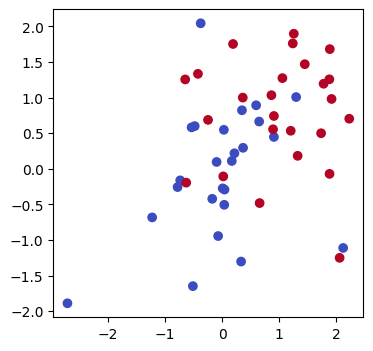

In [21]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1] * 25 + [1] * 25)
X[y==1] += 1

fig, ax = subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

In [4]:
svm_linear = SVC(C=10, kernel="linear")
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

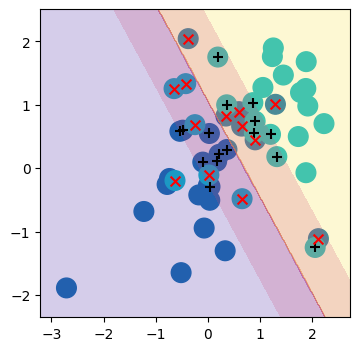

In [8]:
fig, ax = subplots(figsize=(4, 4))
plot_svm(X, y, svm_linear, ax=ax)

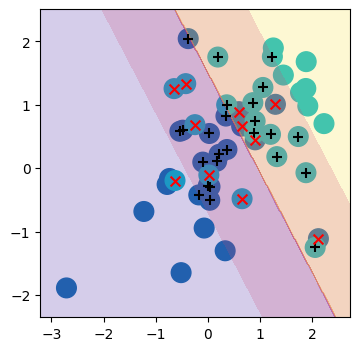

In [9]:
svm_linear_small = SVC(C=0.1, kernel="linear")
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(4, 4))
plot_svm(X, y, svm_linear_small, ax=ax)

In [10]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [11]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear, {'C':[0.001,0.01,0.1,1,5,10,100]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [12]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [14]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1] * 10 + [1] * 10)
X_test[y_test==1] += 1

best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,10,2
1,0,8


In [15]:
svm_ = SVC(C=0.001, kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,4,0
1,6,10


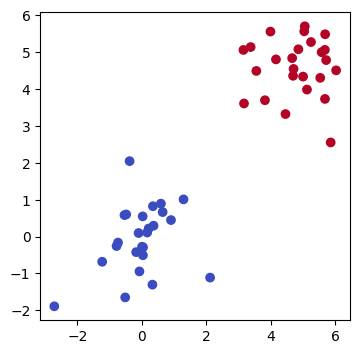

In [26]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(4, 4))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.coolwarm);

In [22]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)

Truth,-1,1
Predicted,,
-1,18,6
1,7,19


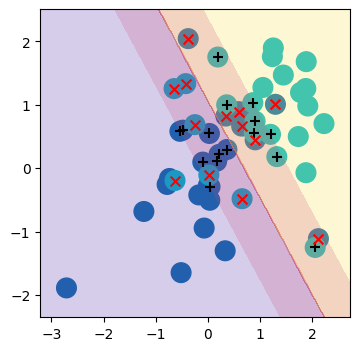

In [24]:
fig, ax = subplots(figsize=(4, 4))
plot_svm(X, y, svm_, ax=ax)